In [2]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm

In [ ]:

# Load the dataset with a progress bar
print("Loading dataset...")
df = pd.read_csv('../data/raw_data/phishing/out.csv')

# prog bar
total_rows = len(df)
with tqdm(total=total_rows, unit='row') as pbar:
    for _, _ in df.iterrows():
        pbar.update(1)

# Display basic information about the dataset
print("\nDataset information:")
df.info()

print("\nSample data:")
print(df.head())

Loading dataset...


100%|██████████| 2500000/2500000 [01:58<00:00, 21054.19row/s]



Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500000 entries, 0 to 2499999
Data columns (total 18 columns):
 #   Column              Dtype  
---  ------              -----  
 0   url                 object 
 1   source              object 
 2   label               object 
 3   url_length          int64  
 4   starts_with_ip      bool   
 5   url_entropy         float64
 6   has_punycode        bool   
 7   digit_letter_ratio  float64
 8   dot_count           int64  
 9   at_count            int64  
 10  dash_count          int64  
 11  tld_count           int64  
 12  domain_has_digits   bool   
 13  subdomain_count     int64  
 14  nan_char_entropy    float64
 15  has_internal_links  bool   
 16  whois_data          object 
 17  domain_age_days     float64
dtypes: bool(4), float64(4), int64(6), object(4)
memory usage: 276.6+ MB

Sample data:
                                             url          source       label  \
0  apaceast.cloudguest.central.arubane

In [4]:
# Define the numerical and categorical features
numerical_features = ['url_length', 'url_entropy', 'digit_letter_ratio', 'dot_count', 'at_count', 
                      'dash_count', 'tld_count', 'subdomain_count', 'nan_char_entropy', 'domain_age_days']

categorical_features = ['starts_with_ip', 'has_punycode', 'domain_has_digits', 'has_internal_links']



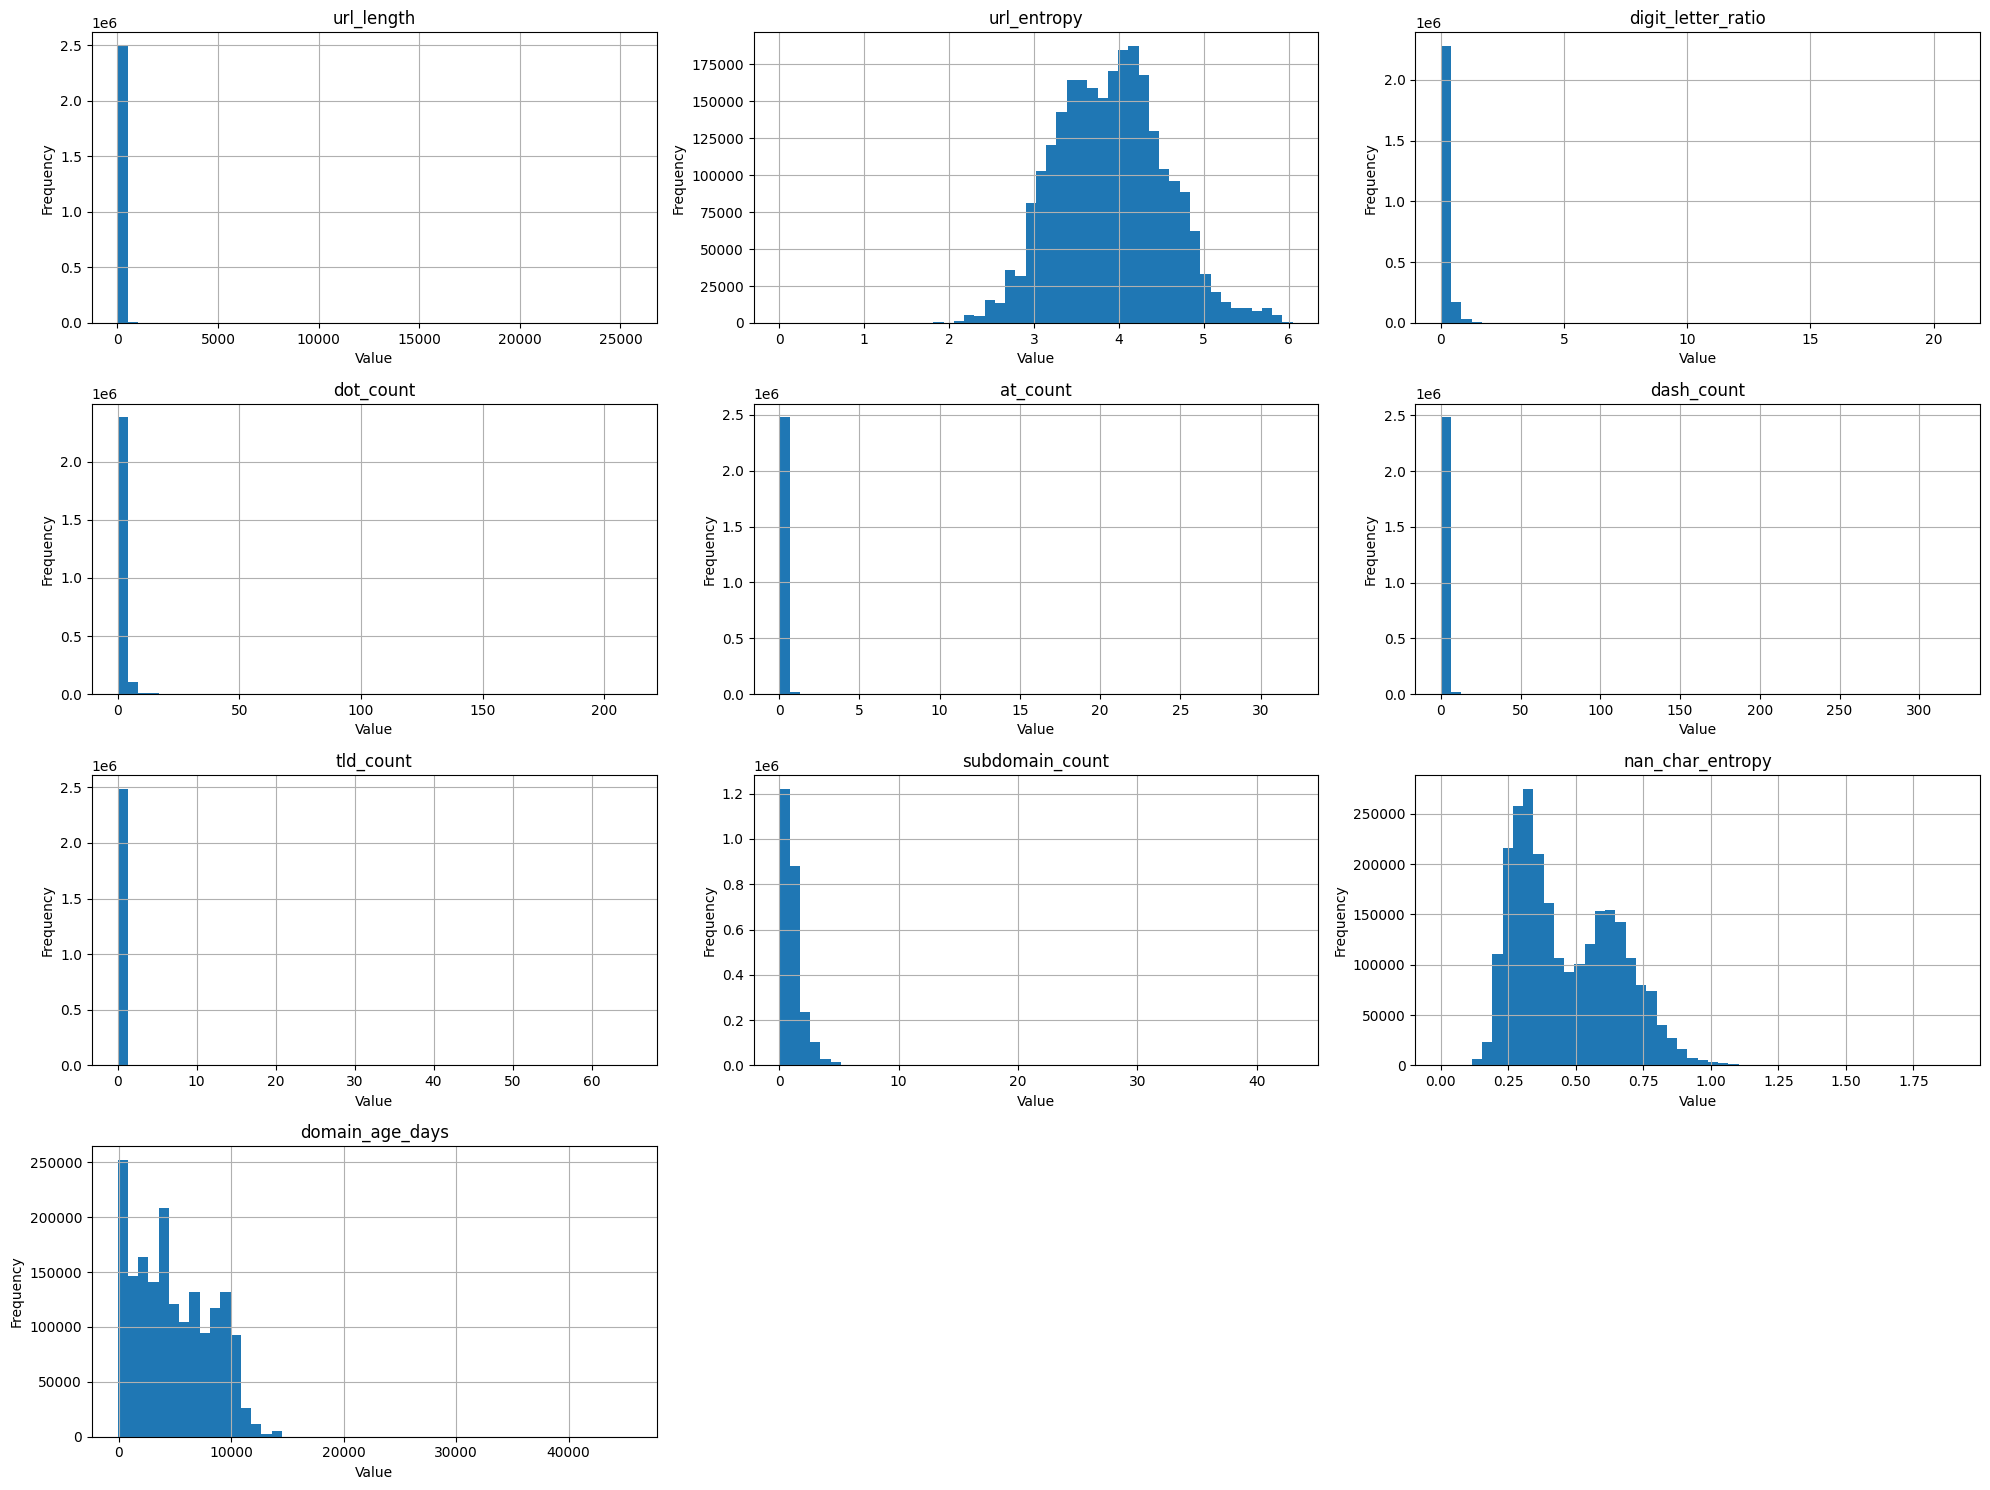

In [5]:
# Plot histograms for numerical features
plt.figure(figsize=(20, 15))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(4, 3, i)
    df[feature].hist(bins=50)
    plt.title(feature)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()
plt.close()

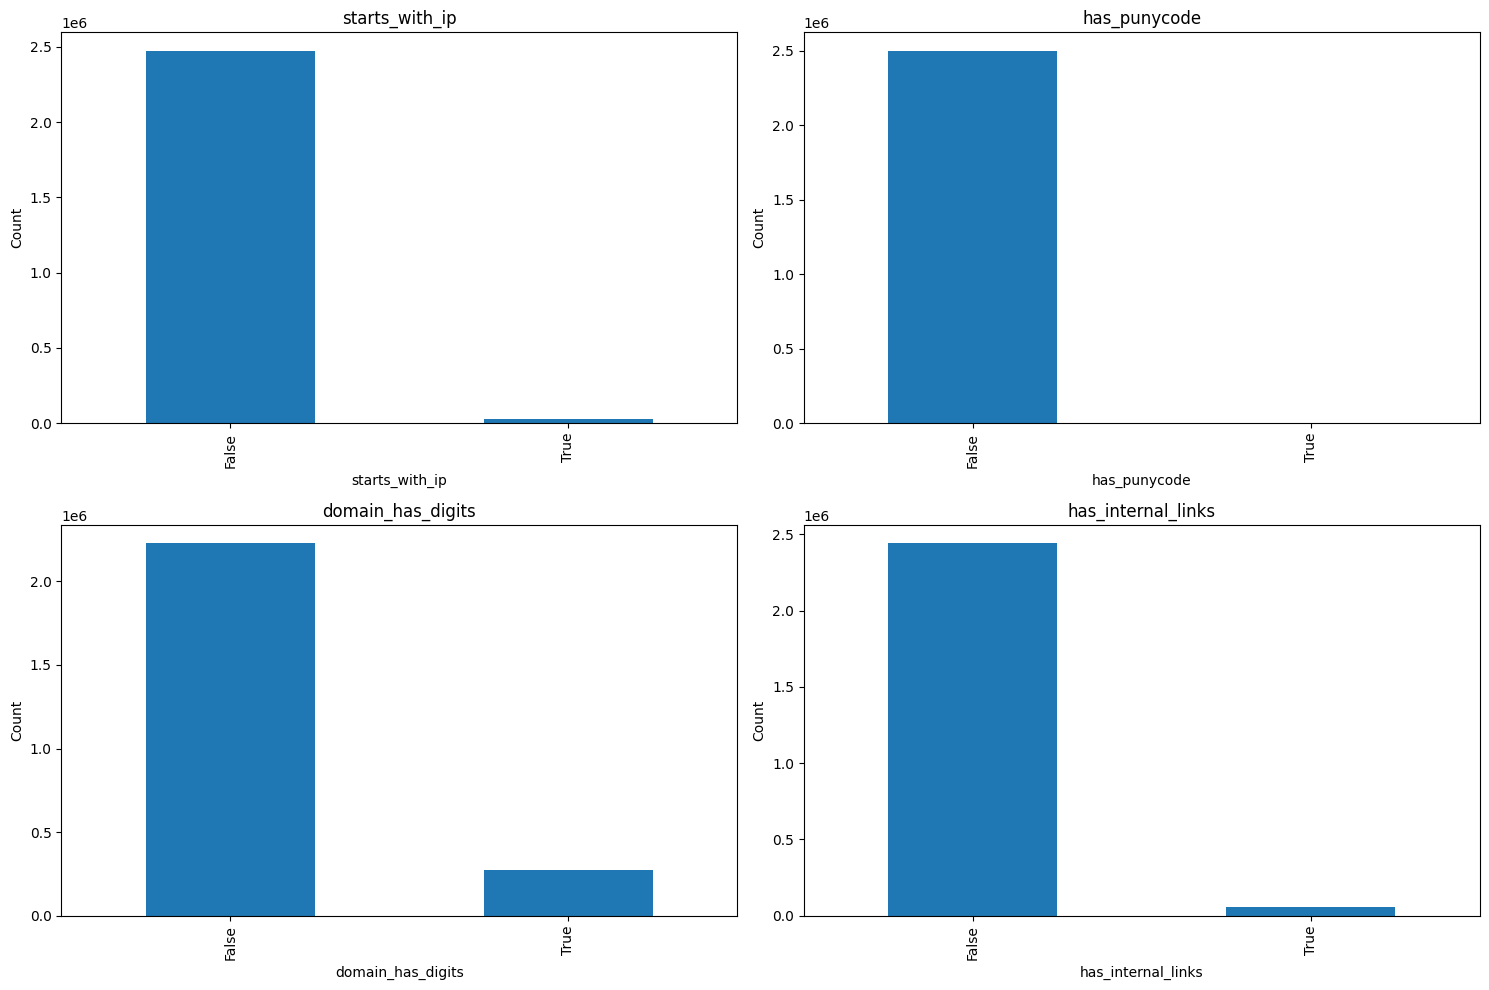

In [6]:

# Plot bar charts for categorical features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 2, i)
    df[feature].value_counts().plot(kind='bar')
    plt.title(feature)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()
plt.close()

In [7]:
# Print summary statistics
print("\nSummary statistics for numerical features:")
print(df[numerical_features].describe())

print("\nValue counts for categorical features:")
for feature in categorical_features:
    print(f"\n{feature}:")
    print(df[feature].value_counts())


Summary statistics for numerical features:
         url_length   url_entropy  digit_letter_ratio     dot_count  \
count  2.500000e+06  2.500000e+06        2.499999e+06  2.500000e+06   
mean   4.588017e+01  3.907981e+00        1.168567e-01  2.174582e+00   
std    7.439959e+01  6.357209e-01        2.451448e-01  1.736380e+00   
min    4.000000e+00 -0.000000e+00        0.000000e+00  0.000000e+00   
25%    1.700000e+01  3.452820e+00        0.000000e+00  1.000000e+00   
50%    2.900000e+01  3.911860e+00        0.000000e+00  2.000000e+00   
75%    5.200000e+01  4.329283e+00        1.333333e-01  3.000000e+00   
max    2.552300e+04  6.048781e+00        2.084000e+01  2.110000e+02   

           at_count    dash_count     tld_count  subdomain_count  \
count  2.500000e+06  2.500000e+06  2.500000e+06     2.500000e+06   
mean   1.141840e-02  7.410540e-01  3.923280e-02     7.777008e-01   
std    1.407410e-01  1.662709e+00  3.905095e-01     1.103257e+00   
min    0.000000e+00  0.000000e+00  0.000000e

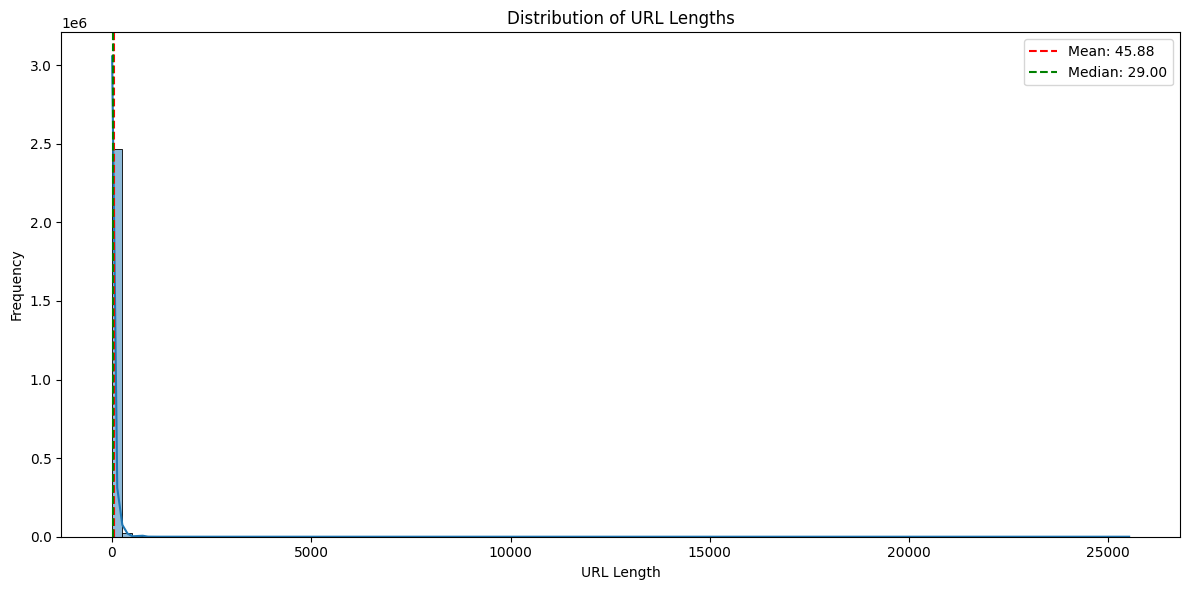

In [8]:
# Create a figure for the URL length distribution
plt.figure(figsize=(12, 6))

# Plot the distribution of URL lengths
sns.histplot(df['url_length'], bins=100, kde=True)

# Set labels and title
plt.xlabel('URL Length')
plt.ylabel('Frequency')
plt.title('Distribution of URL Lengths')

# Add vertical lines for mean and median
mean_length = df['url_length'].mean()
median_length = df['url_length'].median()

plt.axvline(mean_length, color='r', linestyle='--', label=f'Mean: {mean_length:.2f}')
plt.axvline(median_length, color='g', linestyle='--', label=f'Median: {median_length:.2f}')

plt.legend()

# Save the plot
plt.tight_layout()
plt.show()
plt.close()


In [9]:
# statistics
print("\nURL Length Statistics:")
print(df['url_length'].describe())

# Print the shortest and longest URLs
shortest_url = df.loc[df['url_length'].idxmin(), 'url']
longest_url = df.loc[df['url_length'].idxmax(), 'url']

print(f"\nShortest URL (length {len(shortest_url)}):")
print(shortest_url)

print(f"\nLongest URL (length {len(longest_url)}):")
print(longest_url)


URL Length Statistics:
count    2.500000e+06
mean     4.588017e+01
std      7.439959e+01
min      4.000000e+00
25%      1.700000e+01
50%      2.900000e+01
75%      5.200000e+01
max      2.552300e+04
Name: url_length, dtype: float64

Shortest URL (length 4):
v.ua

Longest URL (length 25523):
https://authjgxszcloxpnassocl.firebaseapp.com/hashsso/index.html?emailtoken=a&domain=b.com#eyJ2ZXJzaW9uIjoiMC4yLjAiLCJjb21wcmVzc2VkIjpmYWxzZSwiYm9keSI6IlxuPCFET0NUWVBFIGh0bWw+XG48aGVhZD5cbjxzdHlsZT5cblxuPC9zdHlsZT5cbjxzY3JpcHQgdHlwZT1cInRleHQvamF2YXNjcmlwdFwiPlxuXG48L3NjcmlwdD5cbjwvaGVhZD5cbjxib2R5PlxuIDwhRE9DVFlQRSBodG1sPlxuPGh0bWwgbGFuZz1cImVuXCIgY2xhc3M9XCJ4Zm9udC1mYW1pbHktcm9ib3RvIHhmb250LXNpemUtbiB4dGhpY2stZm9udC1ub1wiPlxuXG48aGVhZD5cblx0PG1ldGEgbmFtZT1cInJvYm90c1wiIGNvbnRlbnQ9XCJub2luZGV4XCIgLz5cbjxtZXRhIGh0dHAtZXF1aXY9XCJjb250ZW50LXR5cGVcIiBjb250ZW50PVwidGV4dC9odG1sOyBjaGFyc2V0PVVURi04XCI+XG48TUVUQSBuYW1lPVwia2V5d29yZHNcIiBjb250ZW50PVwiSG9tZSxTdXBwb3JlLEFib3V0VXMsQmxvZyxBYnVzZSxGYXEsU3VwcG9y

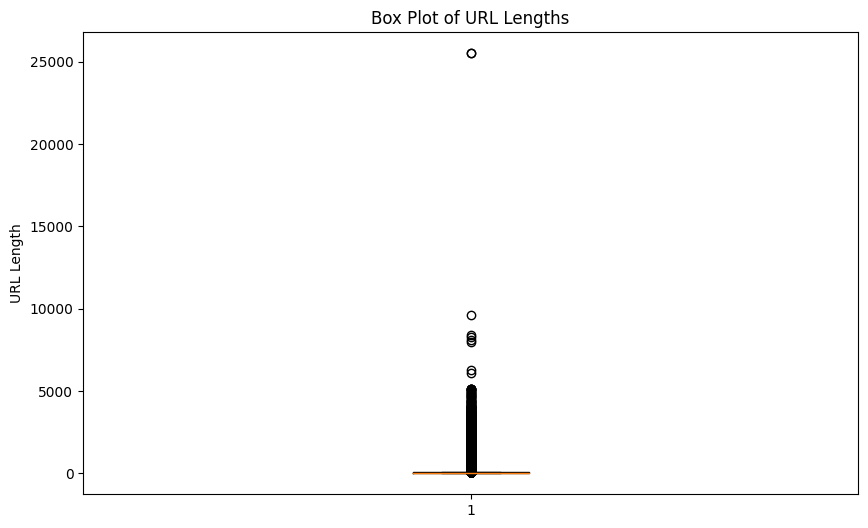

In [10]:
plt.figure(figsize=(10, 6))
plt.boxplot(df['url_length'])
plt.title('Box Plot of URL Lengths')
plt.ylabel('URL Length')
plt.show()

No other URLs in the dataset come close to the length of the longest url, this suggests it's an unusual occurrence.

Such an extreme outlier could indicate:

- A data entry error
- A malformed URL
- An intentionally long URL created for specific purposes (e.g., SEO manipulation, malicious intent)

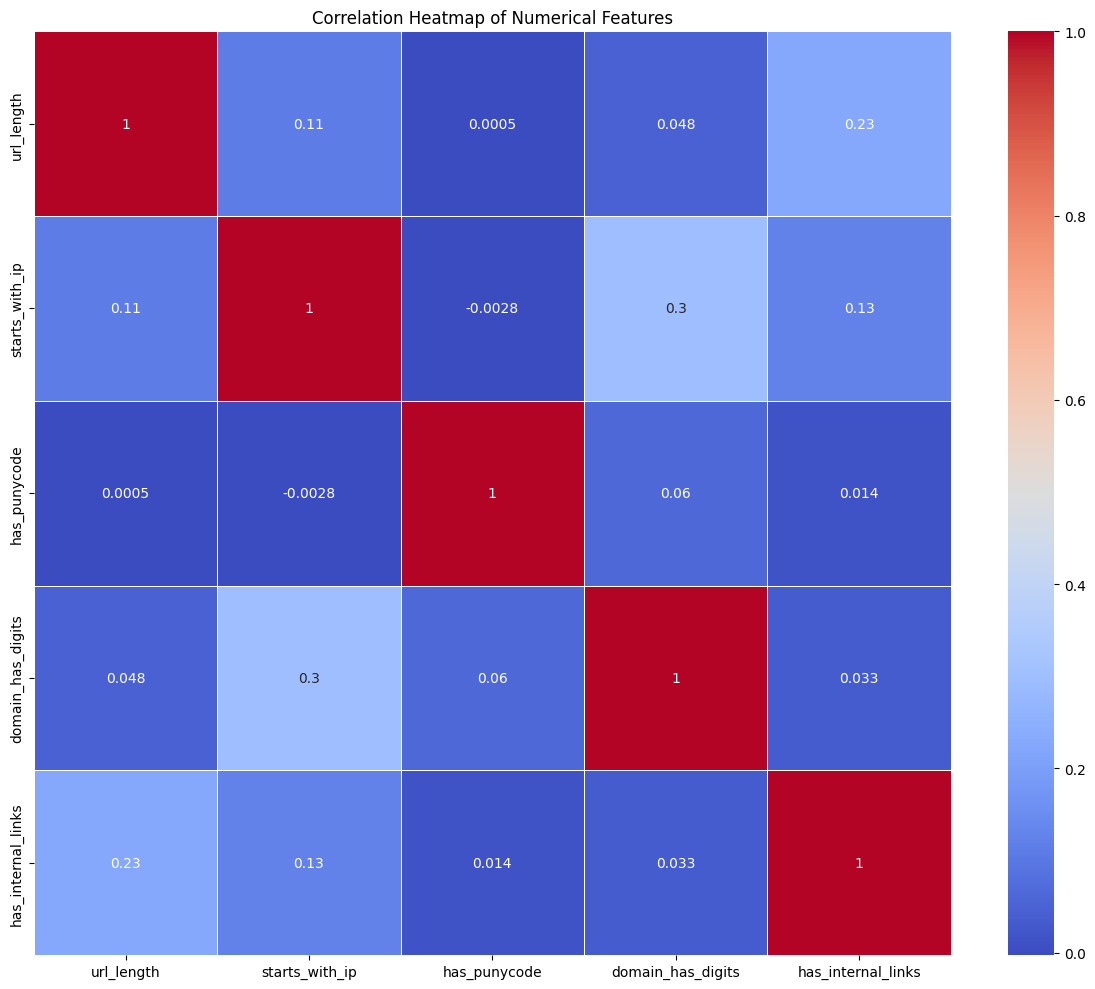

In [11]:
# 3. Calculate correlation between numerical features

# true/false features
binary_features = ['starts_with_ip', 'has_punycode', 'domain_has_digits', 'has_internal_links']

# numerical columns
numerical_columns = ['url_length']
numerical_columns.extend([col for col in binary_features if df[col].dtype != 'object'])

# correlation matrix
correlation_matrix = df[numerical_columns].corr()

# correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()  # Display the heatmap

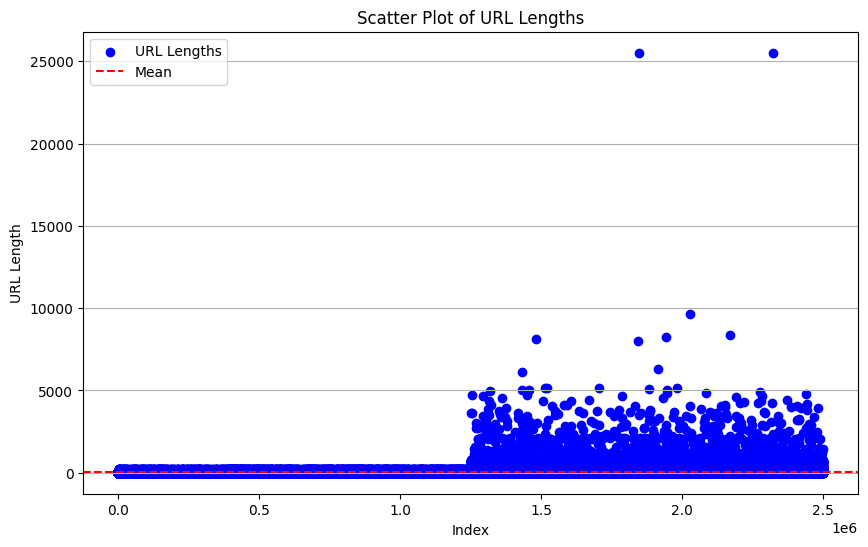

In [12]:
# Calculate mean and standard deviation
mean_url_length = df['url_length'].mean()
std_dev_url_length = df['url_length'].std()

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(range(len(df)), df['url_length'], color='blue', label='URL Lengths')

# Plot the mean
plt.axhline(mean_url_length, color='red', linestyle='--', label='Mean')

# Add titles and labels
plt.title('Scatter Plot of URL Lengths')
plt.xlabel('Index')
plt.ylabel('URL Length')
plt.legend()
plt.grid(axis='y')

# Show the plot
plt.show()

We can easily find two outliers lengths above 25,000 characters